# Visualizing in Python - Driving Licence Data
Visualizing data is an important tool for analyzing it, as it provides a simple and intuitive way to extract information. Understanding your data thoroughly is equally essential for becoming familiar with it and showcasing the final outcomes. But there are many pitfalls when trying to plot correlations. In this notebook, I will demonstrate some straightforward visualizations using one-dimensional data.

In [68]:
import pandas as pd
#pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load the data
The first set of data range from 1980 to 2021 and contains gender and age on swedish driving licence holders. The second set of data range from 1990 to 2021 and contains data on revoked driving licenses.

Both data sets comes from the Swedish Transport Agency.
[Source](https://www.dataportal.se/en/datasets/272_2383/statistics-on-driving-licence-holders#ref=?p=1&q=&s=2&t=20&f=&rt=dataset%24esterms_IndependentDataService%24esterms_ServedByDataService&c=false)


In [69]:
driver_license_data = pd.read_csv('data/driverlicence_swe_1980-2021.csv',delimiter=';',index_col='Year')
driver_license_data.tail()

,Ages -17,Ages 18-19,Ages 20-24,Ages 25-44,Ages 45-64,Ages 65-,Total,Men,Women
Year,,,,,,,,,
2017,75000,101000,400000,1997000,2202000,1746000,6521000,3438000,3082000
2018,81000,105000,386000,2021000,2211000,1787000,6591000,3475000,3116000
2019,90000,110000,376000,2044000,2224000,1825000,6669000,3515000,3154000
2020,97000,114000,372000,2056000,2230000,1862000,6731000,3542000,3189000
2021,109000,125000,378000,2074000,2232000,1899000,6817000,3582000,3234000


In [70]:
revoked_driver_license_data = pd.read_csv('data/revoked_driverlicence_swe_1990-2021.csv',delimiter=';',index_col='Year')
revoked_driver_license_data.tail()

,1,2,3,4,5,6,Total (With Blocking Time),7,8,9,10,Other,Total (Without Blocking Time),Total number of revoked Driving licences
Year,,,,,,,,,,,,,,
2017,5694,209,707,17240,1620,150,23961,5019.0,3739.0,8.0,NaN,9.0,8775.0,32736
2018,5746,185,545,18231,1662,182,24948,5487.0,4161.0,7.0,NaN,14.0,9669.0,34617
2019,6477,158,623,19903,1337,144,26973,5520.0,4164.0,22.0,NaN,13.0,9719.0,36692
2020,6317,154,1020,26050,1156,166,32963,5176.0,3466.0,21.0,NaN,13.0,8640.0,41603
2021,5969,143,1555,25121,983,117,31657,5609.0,4302.0,176.0,NaN,21.0,10041.0,41698


This is the provided information on the revoked licenses:

>Data on the number of registered decisions on revocation of driving licences. The information comes from the Swedish road traffic registry and is divided into years and revocation points (reason). The amount of data is updated at the beginning of each year. There are nine revocation reasons that which a driver's licence can be revoked using. 1. Drunken driving, serious drunken driving or dangerous or reckless driving 2. leaving the scene of an accident 3. Repeated traffic violations, at least three within a two-year period 4.violation of a major traffic regulation such as speeding, running a red light, overtaking at a pedestrian crossing, driving without a licence or dangerous or reckless driving 5. Alcohol-related unreliability 6. Criminal offences in general 7. Illness 8. Failure to submit to injunctions concerning doctor’s certificates or driving tests 9. Driving license issued on false grounds Note. A decision to revoke a driving lincence can be made by using more than one revocation ground (point). This affects the statistics on each revocation ground, but does not affect the total number of revocations. The statistics is updated once a year, at the beginning of each year.


In [71]:
# Drop columns that aren't explaind 
revoked_driver_license_data.drop('Other', axis=1, inplace=True)
revoked_driver_license_data.drop('10', axis=1, inplace=True)
# Impute zero value for NaN's
revoked_driver_license_data.fillna(0, inplace=True)

<Axes: xlabel='Year', ylabel='Total number of revoked Driving licences'>

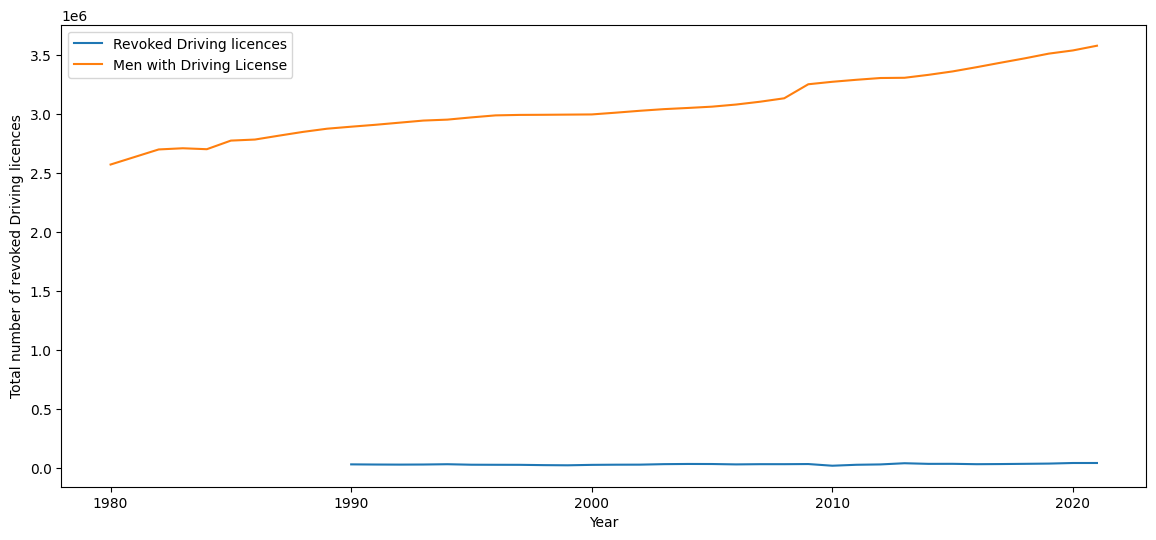

In [72]:
plt.figure(figsize=(14,6))
plt.xlabel('Year')
sns.lineplot(data=revoked_driver_license_data['Total number of revoked Driving licences'],label='Revoked Driving licences')
sns.lineplot(data=driver_license_data['Men'],label='Men with Driving License')


That was not very informational. The difference in values are very large between the different data sets. Lets normalize the data by creating a helper function

In [73]:
def normalize_series(series: pd.Series) -> pd.Series:
    norm_series = series.copy()
    norm_series = (norm_series - norm_series.min()) / (norm_series.max() - norm_series.min())
    return norm_series


<Axes: xlabel='Year', ylabel='Total number of revoked Driving licences'>

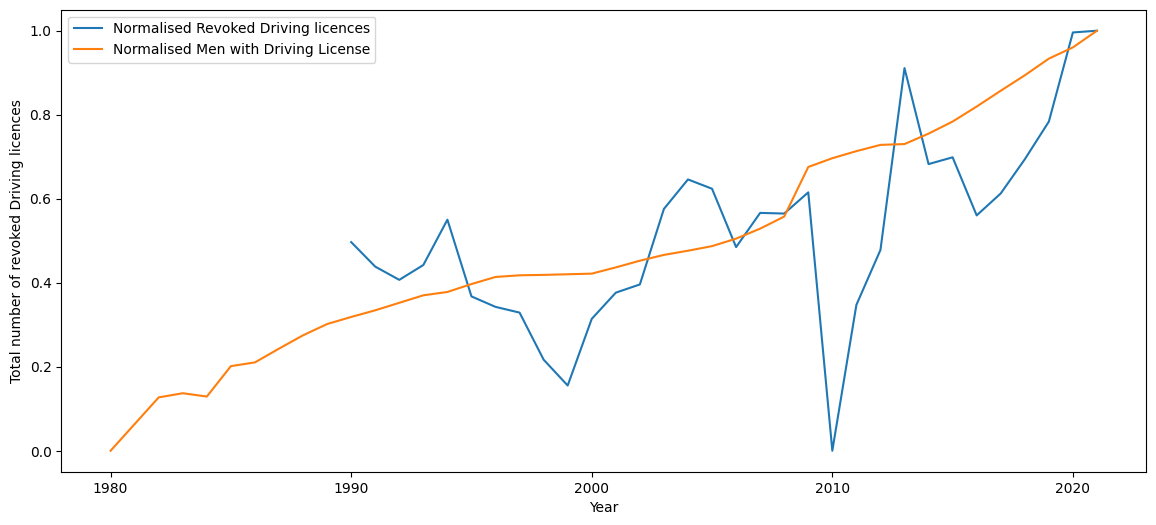

In [74]:
norm_revoked = normalize_series(revoked_driver_license_data['Total number of revoked Driving licences'])
norm_men = normalize_series(driver_license_data['Men'])

plt.figure(figsize=(14,6))
plt.xlabel('Year')
sns.lineplot(data=norm_revoked,label='Normalised Revoked Driving licences')
sns.lineplot(data=norm_men,label='Normalised Men with Driving License')

Now we are able to see that there is a correlation in the increase. But, it is not surprising that more driving licenses are revoked when there is an increase in the number of drivers. Let us see if there is any correlation between the ratio of male and female drivers and the amount of revoked driver licenses.

First three rows:
Year
1980    1.502627
1981    1.490395
1982    1.478118
dtype: float64

Last three rows:
Year
2019    1.114458
2020    1.110693
2021    1.107607
dtype: float64


<Axes: xlabel='Year', ylabel='Total number of revoked Driving licences'>

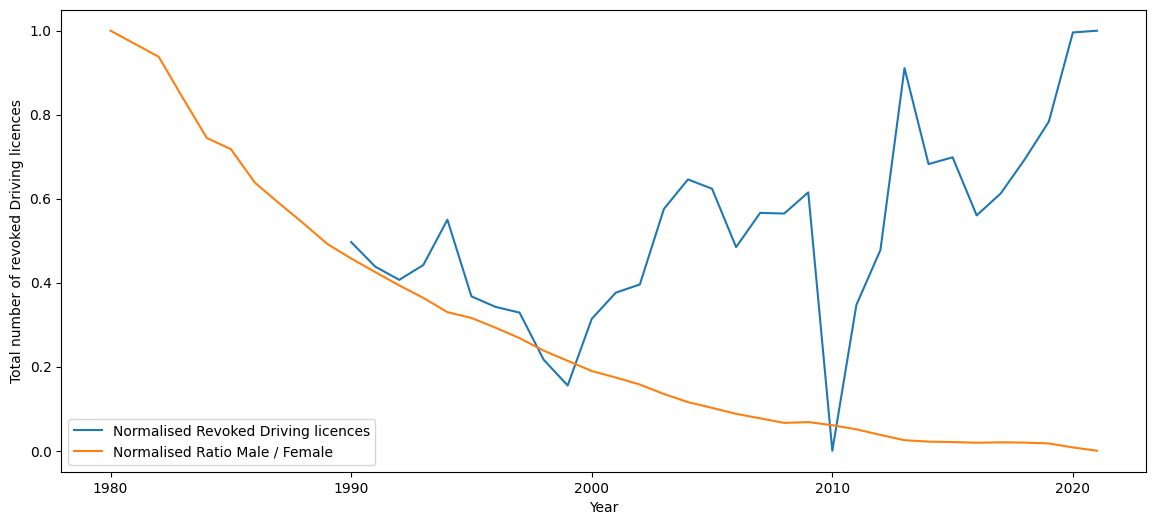

In [75]:
male_driver = driver_license_data['Men'].copy()
female_driver = driver_license_data['Women'].copy()

gender_ratio = male_driver / female_driver
# Print the first three rows
print("First three rows:")
print(gender_ratio[:3])

# Print the last three rows
print("\nLast three rows:")
print(gender_ratio[-3:])

# Now normalize the gender ratio
gender_ratio = normalize_series(gender_ratio)

plt.figure(figsize=(14,6))
plt.xlabel('Year')
sns.lineplot(data=norm_revoked,label='Normalised Revoked Driving licences')
sns.lineplot(data=gender_ratio,label='Normalised Ratio Male / Female')

Look at that, the ratio actually declines. The increase in female drivers are larger than the increase in men drivers. As printed out the cell above, the ratio started out at 1.5 in the 1980's, and closes in to 1.1 in recent years. This may look correlated when presented on graph but it is not. The normalization makes the values look more correlation than they actually are. The only really *certain* information we can predict is that, if there are more people with driver licenses, then we will see an increase in the total number of revoked licenses.  